# IVY Integrations: Kornia

In [1]:
import kornia
import requests
from PIL import Image
import numpy as np

In this Notebook, we will show you how to use Kornia's inbuilt integration methods to alow you to use Kornia with frameworks other than PyTorch!

Here is a lovely picture of Carrick-a-Rede Rope Bridge in Northern Ireland as our example image:

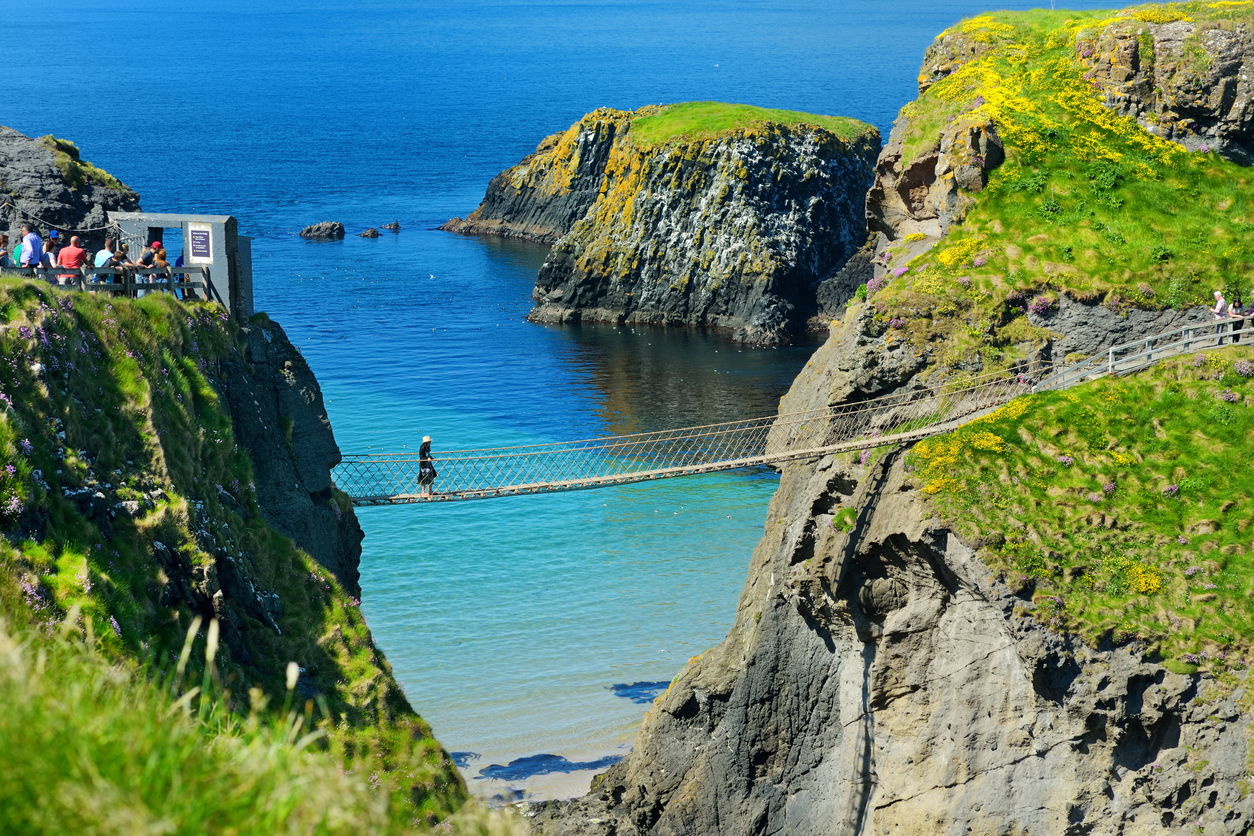

In [5]:
url = "https://scholarlykitchen.sspnet.org/wp-content/uploads/2018/11/iStock-1017973960.jpg"
raw_img = Image.open(requests.get(url, stream=True).raw)
display(raw_img)

## Increasing Sharpness with Kornia and JAX

Here we will show you how you can increase the sharpness of an image using Kornia and JAX. We will use the `to_jax` function from Kornia to do this.

First we will take the raw image and convert it to a JAX array:

In [6]:
import jax.numpy as jnp

In [7]:
img = jnp.transpose(jnp.array(raw_img), (2, 0, 1))
img = jnp.expand_dims(img, 0) / 255

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Then using the `to_jax` method we can convert the `kornia.enhance.sharpness` function to a JAX function:



In [8]:
jax_sharpness = kornia.to_jax(kornia.enhance.sharpness) #transpiling to JAX

out = jax_sharpness(img, 10.0)

type(out)

jaxlib.xla_extension.ArrayImpl

Using NumPy we will display the new image:

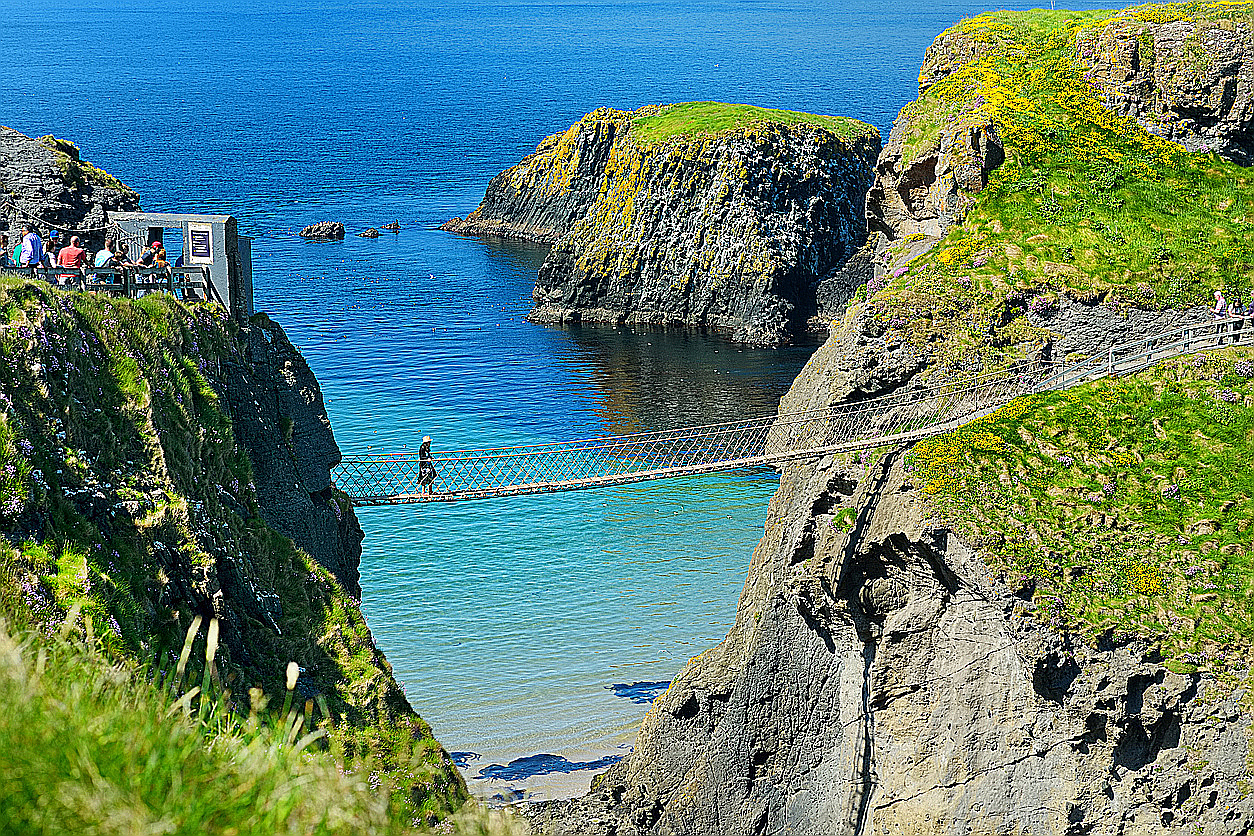

In [9]:
np_image = np.uint8(np.array(out[0])*255)
display(Image.fromarray(np.transpose(np_image, (1, 2, 0))))

And Voila! We have a sharper image!

## Image Blurring Using TensorFlow and Kornia

We can also do this for other supported frameworks such as Tensorflow! Here we will show how you can use Kornia in your Tensorflow code using `to_tensorflow`:

In [10]:
import tensorflow as tf

Here we convert the raw image to a Tensorflow tensor:

In [11]:
img = tf.transpose(tf.convert_to_tensor(raw_img), (2, 0, 1))
img = tf.expand_dims(img, 0) / 255

Using the `to_tensorflow` function we can convert the `kornia.filters.max_blur_pool2d` function to a Tensorflow function:

In [12]:
tf_blur = kornia.to_tensorflow(kornia.filters.max_blur_pool2d) # transpile to tensorflow

out = tf_blur(img, (10,10))

type(out)

tensorflow.python.framework.ops.EagerTensor

We can then use the function as normal in Tensorflow!

Here we can display the new image...

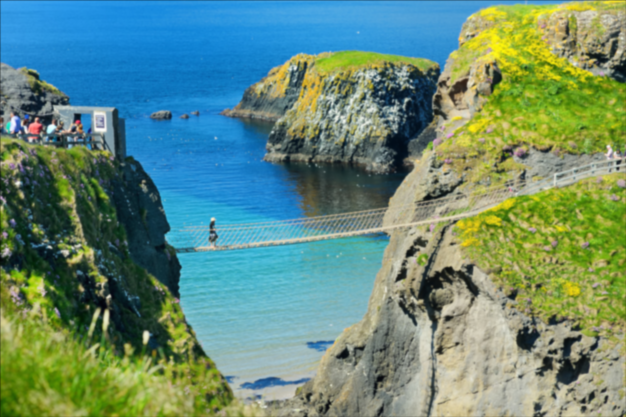

In [13]:
np_image = np.uint8(np.array(out[0])*255)
display(Image.fromarray(np.transpose(np_image, (1, 2, 0))))

Perfect! We have blurred the image using Kornia and Tensorflow!